# Project 2: Ames Housing Data and Kaggle Challenge
___


Homeowners, leasing agents and developers are all interested in knowing where to best invest their money and resources in order to get the greatest return when selling a house.

Investors and realtors are also interested in knowing which houses would be most financially profitable, especially if these evaluations can be discovered first.

Based on the Ames Housing Dataset, a regression model will be created to predict the price of a house at sale.


### Contents: 
- [EDA & Cleaning](#Exploratory-Data-Analysis-and-Cleaning)
  - [Null Values](#Null-Values)
  - [Data Types](#Dtypes)
  - [Outliers](#Outliers)
  - [Collinear Features](#Addressing-Multicollinearity)
  - [Correlations](#Let's-Get-Correlated-!)
- [Preprocessing](#Preprocessing)
  - [Prep the Test Data](#Prep-the-Test-Data)
- [Data Modeling](#Model-the-Data)
  - [Model Evaluation](#Evaluate-Models)
  - [Kaggle Submissions](#Kaggle-Submissions)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


%matplotlib inline

In [2]:
train = pd.read_csv('../project_2/datasets/train.csv')

# Exploratory Data Analysis and Cleaning

[Return to Table of Contents](#Contents:)


In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
def e_d_a_(df): 
    eda = pd.DataFrame({'null_sum': df.isnull().sum(), 'null_percent': df.isnull().mean(),
                        'dtypes': df.dtypes, 'count': df.count(), 
                        'mean': df.mean(), 'median': df.median(),
                        'min': df.min(), 'max': df.max()})
    print(df.shape)
    return eda

e_d_a_(train)

(2051, 81)


,null_sum,null_percent,dtypes,count,mean,median,min,max
1st Flr SF,0,0.000000,int64,2051,1164.488055,1093.0,334,5095
2nd Flr SF,0,0.000000,int64,2051,329.329108,0.0,0,1862
3Ssn Porch,0,0.000000,int64,2051,2.591419,0.0,0,508
Alley,1911,0.931741,object,140,NaN,NaN,NaN,NaN
Bedroom AbvGr,0,0.000000,int64,2051,2.843491,3.0,0,8
...,...,...,...,...,...,...,...,...
Utilities,0,0.000000,object,2051,NaN,NaN,AllPub,NoSewr
Wood Deck SF,0,0.000000,int64,2051,93.833740,0.0,0,1424
Year Built,0,0.000000,int64,2051,1971.708922,1974.0,1872,2010
Year Remod/Add,0,0.000000,int64,2051,1984.190151,1993.0,1950,2010


## Null Values

[Return to Table of Contents](#Contents:)


In [5]:
train.isnull().mean().sort_values().tail(30)

Roof Matl         0.000000
Exterior 1st      0.000000
Exterior 2nd      0.000000
Overall Cond      0.000000
BsmtFin SF 1      0.000488
Total Bsmt SF     0.000488
BsmtFin SF 2      0.000488
Bsmt Unf SF       0.000488
Garage Area       0.000488
Garage Cars       0.000488
Bsmt Full Bath    0.000975
Bsmt Half Bath    0.000975
Mas Vnr Area      0.010726
Mas Vnr Type      0.010726
Bsmt Qual         0.026816
Bsmt Cond         0.026816
BsmtFin Type 1    0.026816
BsmtFin Type 2    0.027304
Bsmt Exposure     0.028279
Garage Type       0.055095
Garage Yr Blt     0.055583
Garage Qual       0.055583
Garage Cond       0.055583
Garage Finish     0.055583
Lot Frontage      0.160897
Fireplace Qu      0.487567
Fence             0.804973
Alley             0.931741
Misc Feature      0.968308
Pool QC           0.995612
dtype: float64

In [6]:
train.isnull().sum().sort_values().tail(30)

Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Overall Cond         0
BsmtFin SF 1         1
Total Bsmt SF        1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Qual           55
Bsmt Cond           55
BsmtFin Type 1      55
BsmtFin Type 2      56
Bsmt Exposure       58
Garage Type        113
Garage Yr Blt      114
Garage Qual        114
Garage Cond        114
Garage Finish      114
Lot Frontage       330
Fireplace Qu      1000
Fence             1651
Alley             1911
Misc Feature      1986
Pool QC           2042
dtype: int64

In [7]:
train['Alley'].value_counts() # NA responses are not listed

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [8]:
train['Fence'].value_counts() # NA responses are not listed

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [9]:
train['Misc Feature'].value_counts() # NA responses are not listed

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc Feature, dtype: int64

In [10]:
train['Mas Vnr Type'].value_counts() # NA responses are not listed

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [11]:
train['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [12]:
train['Garage Finish'].value_counts() # NA responses are not listed

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [13]:
len(train[((train['Garage Cars']==0.0) &
       (train['Garage Finish'].isnull()==True) &
       (train['Garage Cond'].isnull()==True) &
       (train['Garage Qual'].isnull()==True) &
       (train['Garage Yr Blt'].isnull()==True))])

113

In [14]:
train[((train['Garage Cars']!=0.0) &
       (train['Garage Finish'].isnull()==True) &
       (train['Garage Cond'].isnull()==True) &
       (train['Garage Qual'].isnull()==True) &
       (train['Garage Yr Blt'].isnull()==True))]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [15]:
train[((train['Garage Cars']!=0.0) & (train['Garage Finish'].isnull()==True))]['Garage Cars']

1712   NaN
Name: Garage Cars, dtype: float64

In [16]:
train.drop(1712, inplace=True)

In [17]:
train[((train['Fireplaces']!=0.0) &
       (train['Fireplace Qu'].isnull()==True))]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [18]:
len(train[((train['Pool Area']==0.0) &
       (train['Pool QC'].isnull()==True))])

2041

In [19]:
train[((train['Pool Area']!=0.0) &
       (train['Pool QC'].isnull()==True))]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [20]:
len(train[((train['Misc Val']==0.0) &
       (train['Misc Feature'].isnull()==True))])

1985

In [21]:
train[((train['Misc Val']!=0.0) &
       (train['Misc Feature'].isnull()==True))]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


In [22]:
len(train[((train['Total Bsmt SF']==0.0) &
       (train['Bsmt Exposure'].isnull()==True) &
       (train['Bsmt Cond'].isnull()==True) &
       (train['Bsmt Qual'].isnull()==True) &
       (train['BsmtFin Type 1'].isnull()==True) &
       (train['BsmtFin Type 2'].isnull()==True))])

54

In [23]:
# Many variables (relating to Bsmt, Fireplace, Garage, Pool, Misc) 
# have values of NA that seem to be showing up in the dataset as null instead of NA
# BUT they can be verified via a value of zero in a related feature

# Alley and Fence CANNOT be verified by any other feature, but
# I will mark the missing ones as NA, keeping in mind that these could
# either be unlisted or not existing

def null_to_NA(df):
    df['Bsmt Exposure'].fillna('NA', inplace = True)
    df['Bsmt Cond'].fillna('NA', inplace = True)
    df['Bsmt Qual'].fillna('NA', inplace = True)
    df['BsmtFin Type 1'].fillna('NA', inplace = True)
    df['BsmtFin Type 2'].fillna('NA', inplace = True)

    df['Fireplace Qu'].fillna('NA', inplace = True)

    df['Garage Finish'].fillna('NA', inplace = True)
    df['Garage Cond'].fillna('NA', inplace = True)
    df['Garage Qual'].fillna('NA', inplace = True)
    df['Garage Yr Blt'].fillna(0, inplace = True) # the year is a discrete variable
    df['Garage Type'].fillna('NA', inplace = True)
    
    df['Pool QC'].fillna('NA', inplace = True)
    
    df['Misc Feature'].fillna('NA', inplace = True)    
    
    df['Alley'].fillna('NA', inplace = True)
    
    df['Fence'].fillna('NA', inplace = True)
    
    return df.columns[df.isnull().any()]

    # ^ list columns that have null values
    # https://stackoverflow.com/
    # questions/37366717/pandas-print-column-name-with-missing-values/37367344

    
# ^ adapted from https://www.geeksforgeeks.org/
# python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/

In [24]:
null_to_NA(train)

Index(['Lot Frontage', 'Mas Vnr Type', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath',
       'Bsmt Half Bath'],
      dtype='object')

In [25]:
train.isnull().sum().sort_values().tail(30)

Street              0
Lot Area            0
MS Zoning           0
MS SubClass         0
PID                 0
Land Contour        0
Overall Cond        0
SalePrice           0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
BsmtFin Type 2      0
Exter Qual          0
Exter Cond          0
Year Remod/Add      0
Foundation          0
Bsmt Qual           0
Bsmt Cond           0
Bsmt Exposure       0
BsmtFin Type 1      0
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Total Bsmt SF       1
Bsmt Half Bath      2
Bsmt Full Bath      2
Mas Vnr Area       22
Mas Vnr Type       22
Lot Frontage      330
dtype: int64

In [26]:
train['Lot Frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      89
65.0      71
        ... 
22.0       1
155.0      1
153.0      1
119.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

In [27]:
# Lot Frontage has too many null values and cannot be verified
# since it is a continuous variable of "Linear feet of street connected to property"
train = train.drop(columns='Lot Frontage')

# After dropping the columns with too many null values, I will drop the reamining
# rows with any null values so that these do not prevent my model from running.
train = train.dropna()
train.shape

(2026, 80)

In [28]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [29]:
def drop_train_perc(df=train):
    return (2051 - len(df))/2051
    
drop_train_perc()
# Dropping the rows with null values led to a loss of this percentage of the data

0.01218917601170161

## Dtypes

>"The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers)."

However, one column has already been dropped ("Lot Frontage"), and we only started with 81 columns (we seem to be missing the nominal column called "Sale Condition").

So we would expect our data types to be:
- 46 Object/Strings -- (22 nominal, 23 ordinal, 1 obs identifier)
- 15 Integers -- (14 discrete, 1 obs identifier)
- 19 Floats -- (19 continuous - not including "Lot Frontage")

[Return to Table of Contents](#Contents:)


In [30]:
float_cols = train.columns[train.dtypes == float]
int_cols = train.columns[train.dtypes == int]
object_cols = train.columns[train.dtypes == object]

In [31]:
e_d_a_(train[object_cols])

(2026, 42)


,null_sum,null_percent,dtypes,count,mean,median,min,max
Alley,0,0.0,object,2026,NaN,NaN,Grvl,Pave
Bldg Type,0,0.0,object,2026,NaN,NaN,1Fam,TwnhsE
Bsmt Cond,0,0.0,object,2026,NaN,NaN,Ex,TA
Bsmt Exposure,0,0.0,object,2026,NaN,NaN,Av,No
Bsmt Qual,0,0.0,object,2026,NaN,NaN,Ex,TA
BsmtFin Type 1,0,0.0,object,2026,NaN,NaN,ALQ,Unf
BsmtFin Type 2,0,0.0,object,2026,NaN,NaN,ALQ,Unf
Central Air,0,0.0,object,2026,NaN,NaN,N,Y
Condition 1,0,0.0,object,2026,NaN,NaN,Artery,RRNn
Condition 2,0,0.0,object,2026,NaN,NaN,Artery,RRNn


In [32]:
e_d_a_(train[int_cols])

(2026, 28)


,null_sum,null_percent,dtypes,count,mean,median,min,max
Id,0,0.0,int64,2026,1.472936e+03,1480.5,1,2930
PID,0,0.0,int64,2026,7.145517e+08,535454085.0,526301100,924152030
MS SubClass,0,0.0,int64,2026,5.713475e+01,50.0,20,190
Lot Area,0,0.0,int64,2026,1.003843e+04,9402.5,1300,159000
Overall Qual,0,0.0,int64,2026,6.101185e+00,6.0,1,10
Overall Cond,0,0.0,int64,2026,5.567127e+00,5.0,1,9
Year Built,0,0.0,int64,2026,1.971416e+03,1974.0,1872,2010
Year Remod/Add,0,0.0,int64,2026,1.983981e+03,1993.0,1950,2010
1st Flr SF,0,0.0,int64,2026,1.162434e+03,1092.0,334,5095
2nd Flr SF,0,0.0,int64,2026,3.285745e+02,0.0,0,1862


In [33]:
e_d_a_(train[float_cols])

(2026, 10)


,null_sum,null_percent,dtypes,count,mean,median,min,max
Mas Vnr Area,0,0.0,float64,2026,99.843534,0.0,0.0,1600.0
BsmtFin SF 1,0,0.0,float64,2026,442.010365,368.0,0.0,5644.0
BsmtFin SF 2,0,0.0,float64,2026,48.380553,0.0,0.0,1474.0
Bsmt Unf SF,0,0.0,float64,2026,566.524186,474.0,0.0,2336.0
Total Bsmt SF,0,0.0,float64,2026,1056.915104,994.0,0.0,6110.0
Bsmt Full Bath,0,0.0,float64,2026,0.427443,0.0,0.0,3.0
Bsmt Half Bath,0,0.0,float64,2026,0.064166,0.0,0.0,2.0
Garage Yr Blt,0,0.0,float64,2026,1868.990128,1978.0,0.0,2010.0
Garage Cars,0,0.0,float64,2026,1.773445,2.0,0.0,5.0
Garage Area,0,0.0,float64,2026,472.959526,480.0,0.0,1418.0


In [34]:
train['PID'].value_counts().sort_index()

526301100    1
526302030    1
526302040    1
526303060    1
526351010    1
            ..
924100060    1
924100070    1
924151040    1
924151050    1
924152030    1
Name: PID, Length: 2026, dtype: int64

In [35]:
train['Id'].value_counts().sort_index()

1       1
3       1
5       1
8       1
9       1
       ..
2924    1
2926    1
2927    1
2929    1
2930    1
Name: Id, Length: 2026, dtype: int64

In [36]:
train['MS SubClass'].value_counts().sort_index()

20     758
30     101
40       4
45      11
50     198
60     385
70      89
75      16
80      85
85      28
90      75
120    130
150      1
160     88
180     11
190     46
Name: MS SubClass, dtype: int64

In [37]:
# Id and PID are just observational identifiers, so I am dropping them from the training data.

train.drop(columns=['PID', "Id"], inplace=True)

In [38]:
# MS SubClass is a nominal feature of the dataset, so 
# it should be converted from integers to strings.

train['MS SubClass'] = train['MS SubClass'].astype(str)

print(train['MS SubClass'][:10])

0     60
1     60
2     20
3     60
4     50
5     20
6    180
7     20
8     20
9     60
Name: MS SubClass, dtype: object


In [39]:
### Convert Ordinal (Str) to Numeric

ordinal_cols = {
    'Lot Shape': ['NA', 'IR3', 'IR2', 'IR1', 'Reg'],
    'Utilities': ['NA', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    'Land Slope' : ['NA', 'Sev', 'Mod', 'Gtl'],
    'Exter Qual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Exter Cond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Bsmt Qual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 
    'Bsmt Cond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Bsmt Exposure' : ['NA', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFin Type 1' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFin Type 2' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'Heating QC' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Electrical' : ['NA', 'Mix','FuseP', 'FuseF', 'FuseA', 'SBrkr'],
    'Kitchen Qual' : ['NA', 'Po','Fa', 'TA', 'Gd', 'Ex'],
    'Functional' : ['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'Fireplace Qu' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Finish' : ['NA', 'Unf','RFn', 'Fin'],
    'Garage Qual' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Garage Cond' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Paved Drive' : ['NA', 'N', 'P', 'Y'],
    'Pool QC' : ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence' : ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}


df_ordinal_obj = train.copy()


ordinal_dict ={}
for key, value in ordinal_cols.items():
    ordinal_dict[key]={}
    for n in range(len(value)):
        ordinal_dict[key][value[n]]=n
    

for col,vals in ordinal_dict.items():
    print(col)
    print(vals)
    train[col] = [vals[x] for x in train[col]]

Lot Shape
{'NA': 0, 'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
Utilities
{'NA': 0, 'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
Land Slope
{'NA': 0, 'Sev': 1, 'Mod': 2, 'Gtl': 3}
Exter Qual
{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Exter Cond
{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Bsmt Qual
{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Bsmt Cond
{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Bsmt Exposure
{'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
BsmtFin Type 1
{'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
BsmtFin Type 2
{'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
Heating QC
{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Electrical
{'NA': 0, 'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5}
Kitchen Qual
{'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Functional
{'NA': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}
Fireplace 

In [40]:
float_cols = train.columns[train.dtypes == float]
int_cols = train.columns[train.dtypes == int]
object_cols = train.columns[train.dtypes == object]

In [41]:
e_d_a_(train[object_cols])

(2026, 22)


,null_sum,null_percent,dtypes,count,mean,median,min,max
Alley,0,0.0,object,2026,NaN,NaN,Grvl,Pave
Bldg Type,0,0.0,object,2026,NaN,NaN,1Fam,TwnhsE
Central Air,0,0.0,object,2026,NaN,NaN,N,Y
Condition 1,0,0.0,object,2026,NaN,NaN,Artery,RRNn
Condition 2,0,0.0,object,2026,NaN,NaN,Artery,RRNn
Exterior 1st,0,0.0,object,2026,NaN,NaN,AsbShng,WdShing
Exterior 2nd,0,0.0,object,2026,NaN,NaN,AsbShng,Wd Shng
Foundation,0,0.0,object,2026,NaN,NaN,BrkTil,Wood
Garage Type,0,0.0,object,2026,NaN,NaN,2Types,NA
Heating,0,0.0,object,2026,NaN,NaN,GasA,Wall


In [42]:
e_d_a_(train[int_cols])

(2026, 46)


,null_sum,null_percent,dtypes,count,mean,median,min,max
Lot Area,0,0.0,int64,2026,10038.427937,9402.5,1300,159000
Lot Shape,0,0.0,int64,2026,3.597730,4.0,1,4
Utilities,0,0.0,int64,2026,3.998519,4.0,2,4
Land Slope,0,0.0,int64,2026,2.946693,3.0,1,3
Overall Qual,0,0.0,int64,2026,6.101185,6.0,1,10
Overall Cond,0,0.0,int64,2026,5.567127,5.0,1,9
Year Built,0,0.0,int64,2026,1971.415597,1974.0,1872,2010
Year Remod/Add,0,0.0,int64,2026,1983.980750,1993.0,1950,2010
Exter Qual,0,0.0,int64,2026,3.400296,3.0,2,5
Exter Cond,0,0.0,int64,2026,3.086871,3.0,1,5


In [43]:
e_d_a_(train[float_cols])

(2026, 10)


,null_sum,null_percent,dtypes,count,mean,median,min,max
Mas Vnr Area,0,0.0,float64,2026,99.843534,0.0,0.0,1600.0
BsmtFin SF 1,0,0.0,float64,2026,442.010365,368.0,0.0,5644.0
BsmtFin SF 2,0,0.0,float64,2026,48.380553,0.0,0.0,1474.0
Bsmt Unf SF,0,0.0,float64,2026,566.524186,474.0,0.0,2336.0
Total Bsmt SF,0,0.0,float64,2026,1056.915104,994.0,0.0,6110.0
Bsmt Full Bath,0,0.0,float64,2026,0.427443,0.0,0.0,3.0
Bsmt Half Bath,0,0.0,float64,2026,0.064166,0.0,0.0,2.0
Garage Yr Blt,0,0.0,float64,2026,1868.990128,1978.0,0.0,2010.0
Garage Cars,0,0.0,float64,2026,1.773445,2.0,0.0,5.0
Garage Area,0,0.0,float64,2026,472.959526,480.0,0.0,1418.0


In [44]:
float_cols = train.columns[train.dtypes == float]
int_cols = train.columns[train.dtypes == int]
object_cols = train.columns[train.dtypes == object]

train = pd.get_dummies(train, columns=object_cols, drop_first=True)

In [45]:
train.shape

(2026, 210)

In [46]:
# Feature Engineering
def feat_engine(df):
    df['age_house'] = df['Yr Sold'] - df['Year Built']
    df['yr_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df['age_gar'] = df['Yr Sold'] - df['Garage Yr Blt']
    # ^ the age of the garage will be the same as the Yr Sold if no garage listed...

    return df.drop(columns=['Year Built', 'Year Remod/Add', 'Garage Yr Blt'], inplace=True)


In [47]:
feat_engine(train)

## Outliers


[Return to Table of Contents](#Contents:)


In [48]:
float_cols = train.columns[train.dtypes == float]
int_cols = train.columns[train.dtypes == int]
object_cols = train.columns[train.dtypes == object]

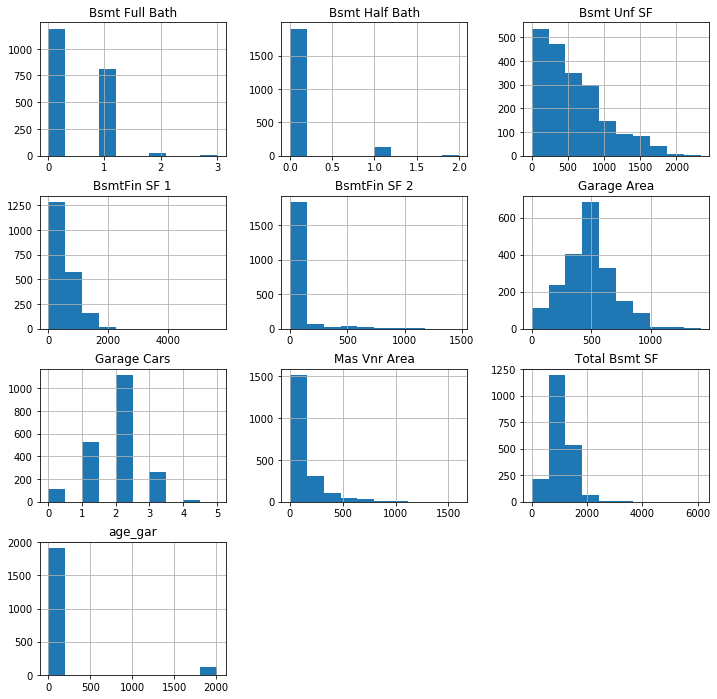

In [49]:
train[float_cols].hist(figsize=(12,12));

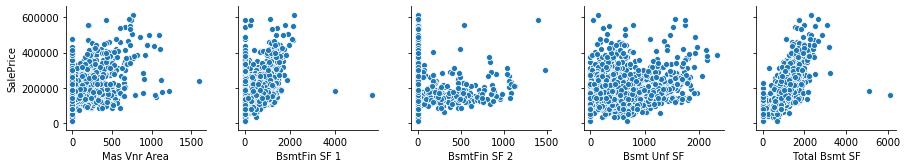

In [50]:
sns.pairplot(data=train, x_vars=float_cols[:5], y_vars='SalePrice');

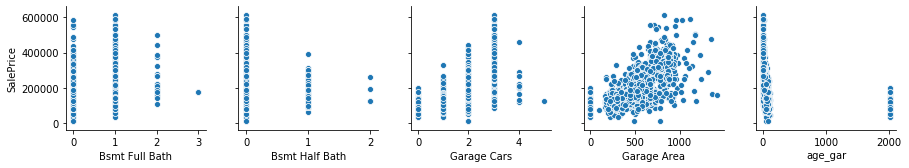

In [51]:
sns.pairplot(data=train, x_vars=float_cols[5:], y_vars='SalePrice');

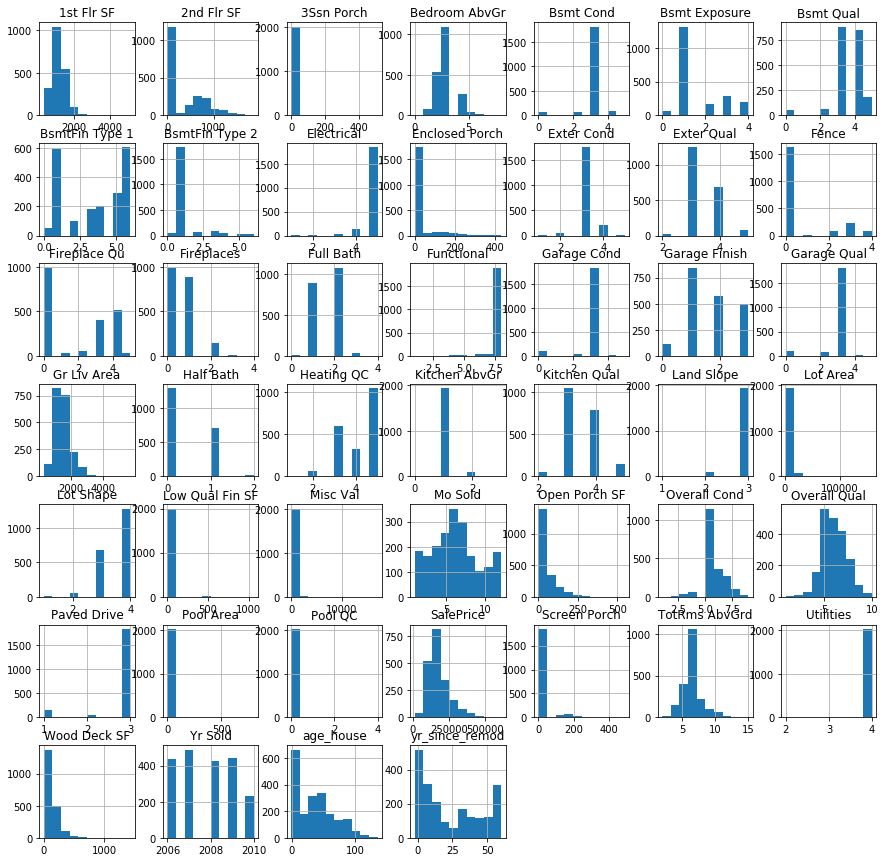

In [52]:
train[int_cols].hist(figsize=(15,15));

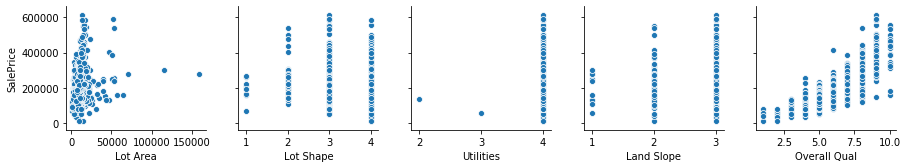

In [53]:
sns.pairplot(data=train, x_vars=int_cols[:5], y_vars='SalePrice');

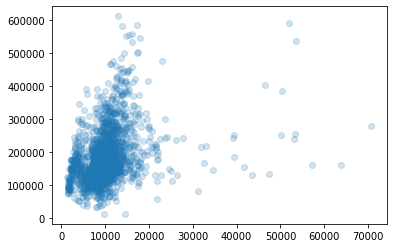

In [54]:
plt.scatter(train['Lot Area'][(train['Lot Area']<100_000)], 
            train['SalePrice'][(train['Lot Area']<100_000)], 
           alpha=.2);

In [55]:
train = train[(train['Lot Area']<100_000)]

drop_train_perc()

0.01218917601170161

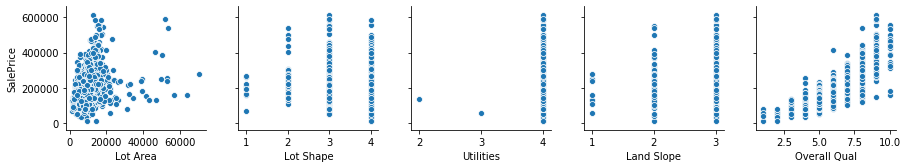

In [56]:
sns.pairplot(data=train, x_vars=int_cols[:5], y_vars='SalePrice');

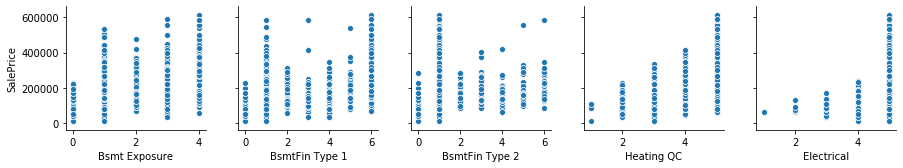

In [57]:
sns.pairplot(data=train, x_vars=int_cols[10:][:5], y_vars='SalePrice');

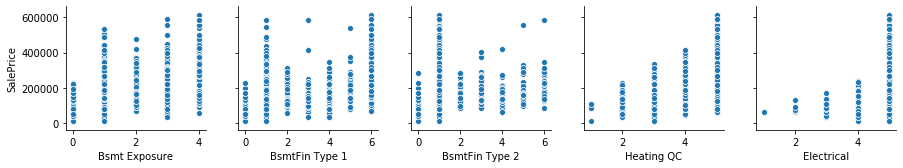

In [58]:
sns.pairplot(data=train, x_vars=int_cols[10:][:5], y_vars='SalePrice');

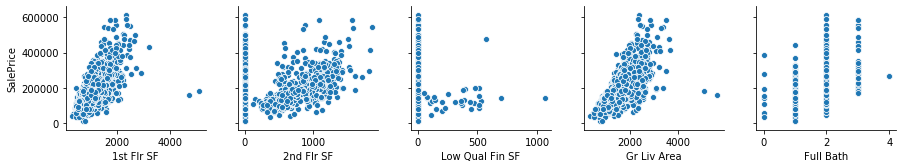

In [59]:
sns.pairplot(data=train, x_vars=int_cols[15:][:5], y_vars='SalePrice');

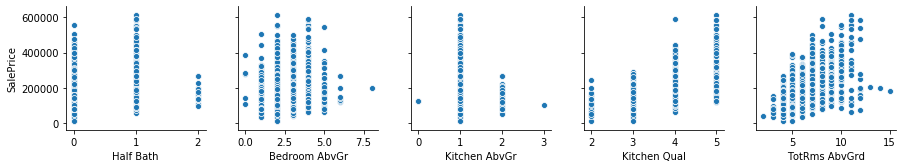

In [60]:
sns.pairplot(data=train, x_vars=int_cols[20:][:5], y_vars='SalePrice');

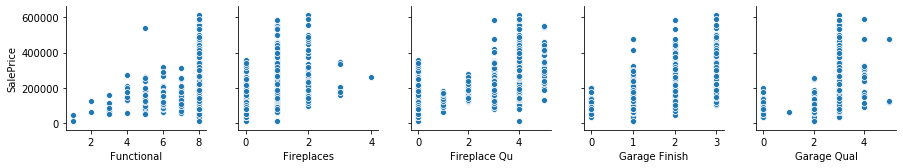

In [61]:
sns.pairplot(data=train, x_vars=int_cols[25:][:5], y_vars='SalePrice');

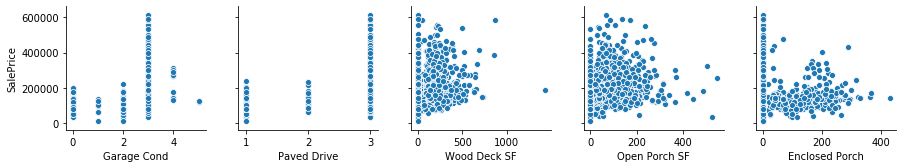

In [62]:
sns.pairplot(data=train, x_vars=int_cols[30:][:5], y_vars='SalePrice');

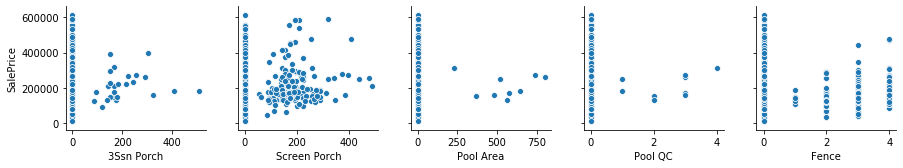

In [63]:
sns.pairplot(data=train, x_vars=int_cols[35:][:5], y_vars='SalePrice');

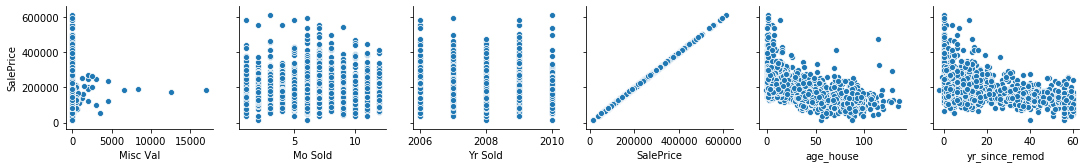

In [64]:
sns.pairplot(data=train, x_vars=int_cols[40:][:6], y_vars='SalePrice');

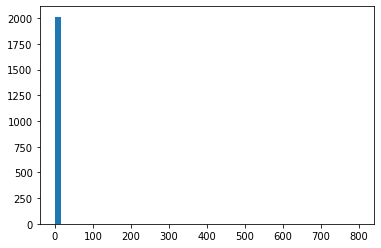

In [65]:
plt.hist(train['Pool Area'], bins=50);

In [66]:
train['Pool Area'].value_counts()

0      2015
800       1
738       1
648       1
576       1
561       1
519       1
480       1
368       1
228       1
Name: Pool Area, dtype: int64

In [67]:
train['Pool QC'].value_counts()

0    2015
3       4
2       2
1       2
4       1
Name: Pool QC, dtype: int64

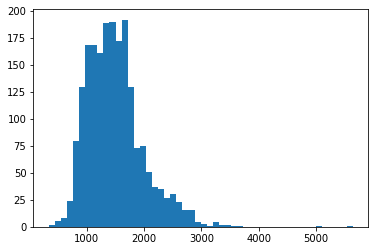

In [68]:
plt.hist(train['Gr Liv Area'], bins=50);

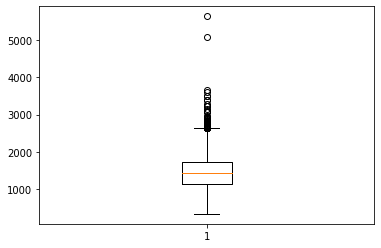

In [69]:
plt.boxplot(train['Gr Liv Area']);

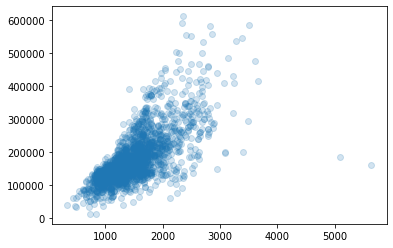

In [70]:
plt.scatter(train['Gr Liv Area'], train['SalePrice'], alpha=.2);

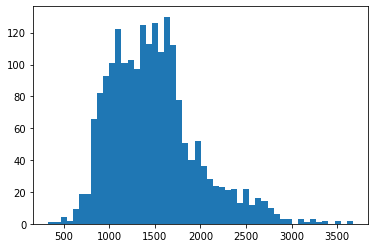

In [71]:
train = train[(train['Gr Liv Area']<4000)]
plt.hist(train['Gr Liv Area'], bins=50);

In [72]:
train.shape

(2022, 210)

In [73]:
drop_train_perc()

0.01218917601170161

## Addressing Multicollinearity

[Return to Table of Contents](#Contents:)


In [74]:
train.corr().sort_values(by='SalePrice')['SalePrice']

age_house            -0.573129
yr_since_remod       -0.550556
Mas Vnr Type_None    -0.421495
Garage Type_Detchd   -0.368151
Foundation_CBlock    -0.356283
                        ...   
Kitchen Qual          0.692857
Exter Qual            0.715601
Gr Liv Area           0.721687
Overall Qual          0.803676
SalePrice             1.000000
Name: SalePrice, Length: 210, dtype: float64

In [75]:
train.corr().sort_values(by='SalePrice', ascending=False)['SalePrice'].head(15)

SalePrice           1.000000
Overall Qual        0.803676
Gr Liv Area         0.721687
Exter Qual          0.715601
Kitchen Qual        0.692857
Total Bsmt SF       0.667993
1st Flr SF          0.654112
Garage Area         0.654078
Garage Cars         0.647697
Bsmt Qual           0.616127
Garage Finish       0.559650
Full Bath           0.538340
Fireplace Qu        0.537544
Foundation_PConc    0.532488
Mas Vnr Area        0.519463
Name: SalePrice, dtype: float64

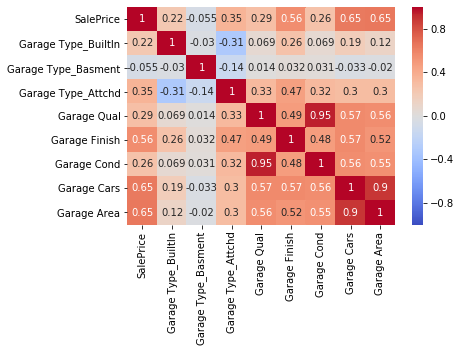

In [76]:
sns.heatmap(train[['SalePrice', 'Garage Type_BuiltIn', 'Garage Type_Basment',
                    'Garage Type_Attchd', 'Garage Qual', 'Garage Finish',
                    'Garage Cond', 'Garage Cars', 'Garage Area']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

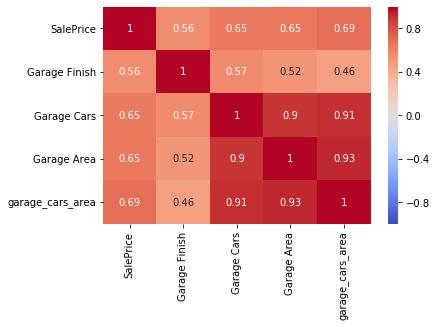

In [77]:
train['garage_cars_area'] = train['Garage Cars'] * train['Garage Area']

sns.heatmap(train[['SalePrice', 'Garage Finish',
                   'Garage Cars', 'Garage Area', 'garage_cars_area']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

# sns.pairplot(train[['SalePrice', 'Garage Finish',
#                     'Garage Cars', 'Garage Area', 'garage_cars_area']]);

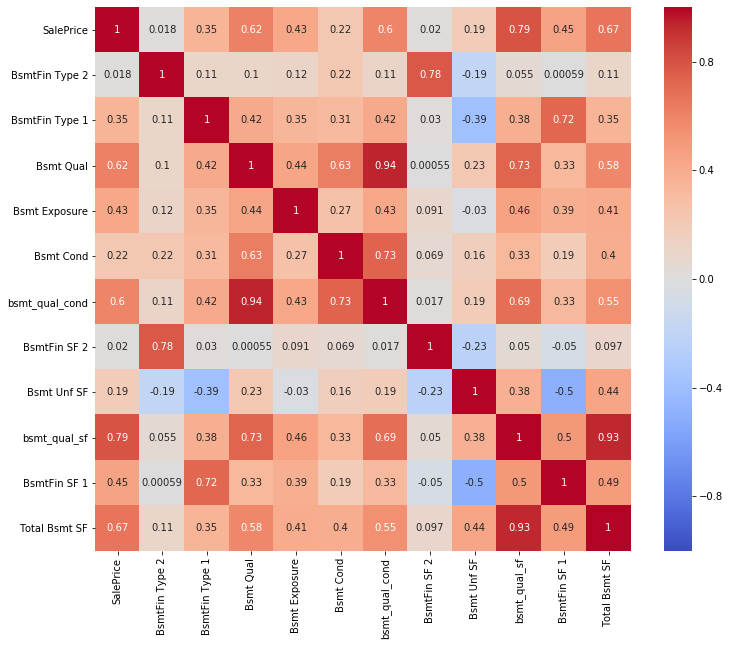

In [78]:
fig,ax = plt.subplots(figsize=(12,10))

train['bsmt_qual_cond'] = train['Bsmt Qual'] * train['Bsmt Cond']
train['bsmt_qual_sf'] = train['Bsmt Qual'] * train['Total Bsmt SF']


sns.heatmap(train[['SalePrice', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual',
                    'Bsmt Exposure', 'Bsmt Cond', 'bsmt_qual_cond',
                    'BsmtFin SF 2', 'Bsmt Unf SF', 'bsmt_qual_sf',
                    'BsmtFin SF 1', 'Total Bsmt SF']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

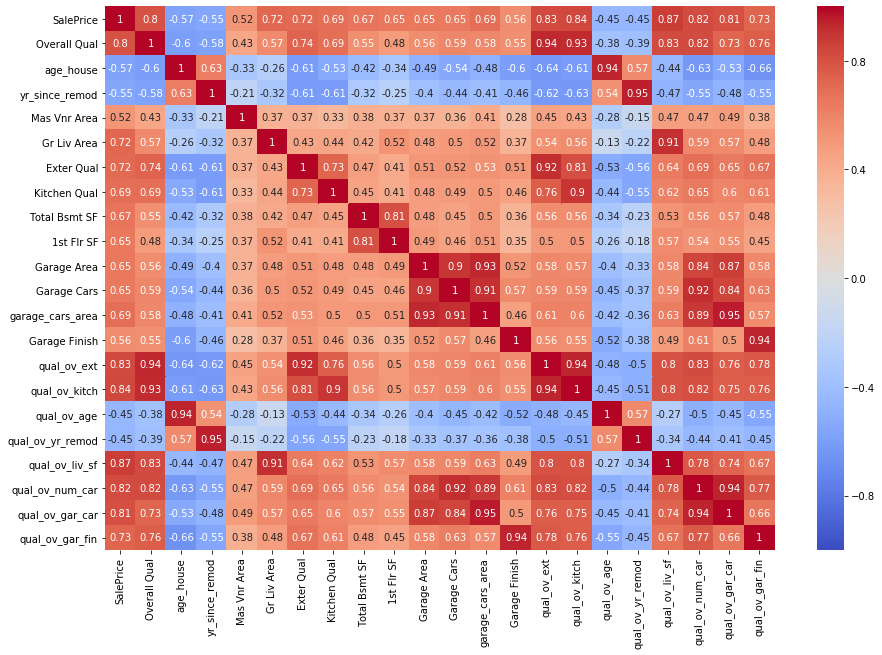

In [79]:
fig,ax = plt.subplots(figsize=(15,10))

train['qual_ov_ext'] = train['Overall Qual'] * train['Exter Qual']
train['qual_ov_kitch'] = train['Overall Qual'] * train['Kitchen Qual']
train['qual_ov_age'] = train['Overall Qual'] * train['age_house']
train['qual_ov_yr_remod'] = train['Overall Qual'] * train['yr_since_remod']
train['qual_ov_liv_sf'] = train['Overall Qual'] * train['Gr Liv Area']
train['qual_ov_bsmt_sf'] = train['Overall Qual'] * train['Total Bsmt SF']
train['qual_ov_gar_sf'] = train['Overall Qual'] * train['Garage Area']
train['qual_ov_num_car'] = train['Overall Qual'] * train['Garage Cars']
train['qual_ov_gar_car'] = train['Overall Qual'] * train['garage_cars_area']
train['qual_ov_gar_fin'] = train['Overall Qual'] * train['Garage Finish']


sns.heatmap(train[['SalePrice', 'Overall Qual', 'age_house', 'yr_since_remod',
                    'Mas Vnr Area', 'Gr Liv Area', 'Exter Qual', 'Kitchen Qual', 
                   'Total Bsmt SF', '1st Flr SF', 'Garage Area', 'Garage Cars', 'garage_cars_area',
                   'Garage Finish', 'qual_ov_ext', 'qual_ov_kitch', 'qual_ov_age', 
                  'qual_ov_yr_remod', 'qual_ov_liv_sf', 'qual_ov_num_car', 'qual_ov_gar_car',
                  'qual_ov_gar_fin']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');


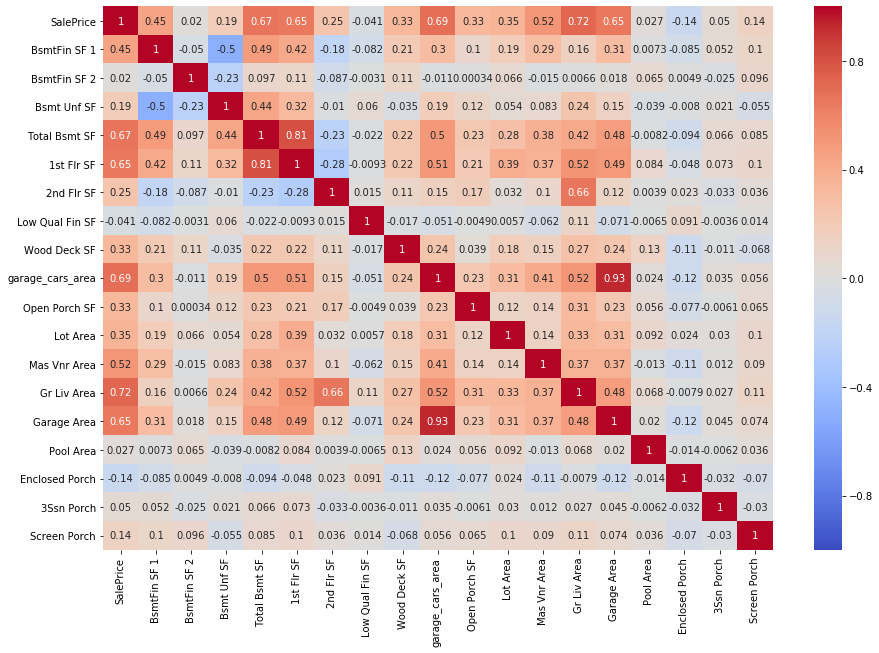

In [80]:
fig,ax = plt.subplots(figsize=(15,10))

sns.heatmap(train[['SalePrice', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Wood Deck SF', 'garage_cars_area',
       'Open Porch SF', 'Lot Area', 'Mas Vnr Area', 'Gr Liv Area', 'Garage Area', 'Pool Area',
                  'Enclosed Porch', '3Ssn Porch', 'Screen Porch']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

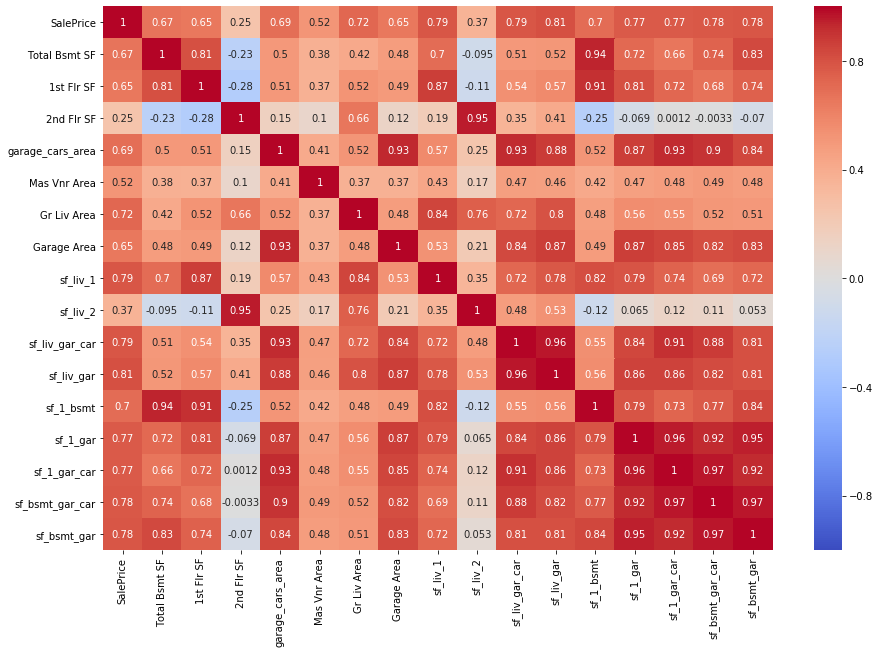

In [81]:
fig,ax = plt.subplots(figsize=(15,10))

train['sf_liv_1'] = train['1st Flr SF'] * train['Gr Liv Area']
train['sf_liv_2'] = train['2nd Flr SF'] * train['Gr Liv Area']
train['sf_liv_gar_car'] = train['garage_cars_area'] * train['Gr Liv Area']
train['sf_liv_gar'] = train['Garage Area'] * train['Gr Liv Area']
train['sf_1_bsmt'] = train['1st Flr SF'] * train['Total Bsmt SF']
train['sf_1_gar'] = train['1st Flr SF'] * train['Garage Area']
train['sf_1_gar_car'] = train['1st Flr SF'] * train['garage_cars_area']
train['sf_bsmt_gar_car'] = train['Total Bsmt SF'] * train['garage_cars_area']
train['sf_bsmt_gar'] = train['Total Bsmt SF'] * train['Garage Area']


sns.heatmap(train[['SalePrice', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'garage_cars_area',
       'Mas Vnr Area', 'Gr Liv Area', 'Garage Area',
                  'sf_liv_1', 'sf_liv_2', 'sf_liv_gar_car', 'sf_liv_gar',
                  'sf_1_bsmt', 'sf_1_gar', 'sf_1_gar_car', 'sf_bsmt_gar_car', 'sf_bsmt_gar']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

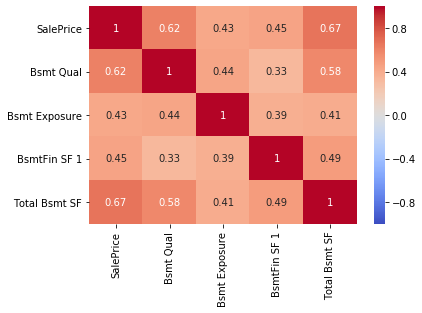

In [82]:
sns.heatmap(train[['SalePrice', 'Bsmt Qual', 'Bsmt Exposure', 
                    'BsmtFin SF 1', 'Total Bsmt SF']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

# sns.pairplot(train[['SalePrice', 'Bsmt Qual', 'Bsmt Exposure', 
#                     'BsmtFin SF 1', 'Total Bsmt SF']]);

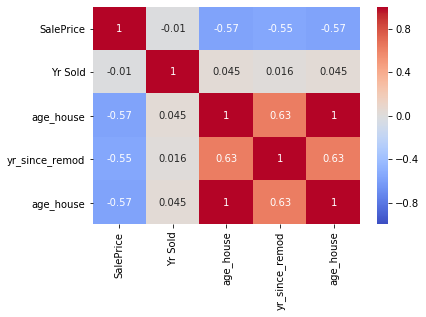

In [83]:
sns.heatmap(train[['SalePrice', 'Yr Sold',
                    'age_house', 'yr_since_remod', 'age_house']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

# sns.pairplot(train[['SalePrice', 'Yr Sold',
#                     'age_house', 'age_house', 'yr_since_remod']]);

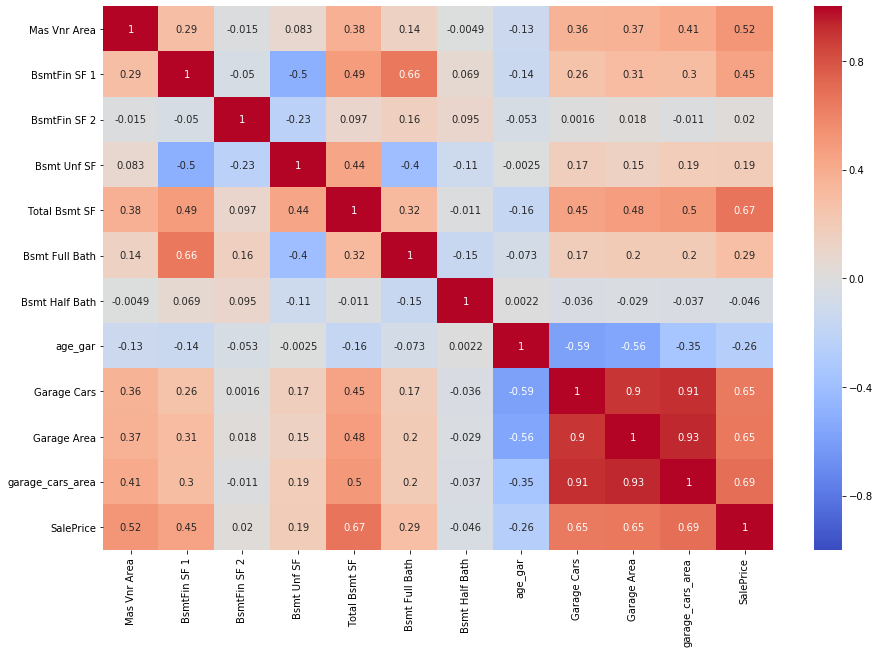

In [84]:
fig,ax = plt.subplots(figsize=(15,10))

sns.heatmap(train[['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'age_gar',
       'Garage Cars', 'Garage Area', 'garage_cars_area', 'SalePrice']].corr(), annot= True, 
           vmin=-1,
           vmax=1,
           cmap='coolwarm');

# Let's Get Correlated !

[Return to Table of Contents](#Contents:)


Index(['Overall Qual', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplace Qu', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Foundation_PConc', 'age_house',
       'yr_since_remod', 'garage_cars_area', 'bsmt_qual_cond', 'bsmt_qual_sf',
       'qual_ov_ext', 'qual_ov_kitch', 'qual_ov_liv_sf', 'qual_ov_bsmt_sf',
       'qual_ov_gar_sf', 'qual_ov_num_car', 'qual_ov_gar_car',
       'qual_ov_gar_fin', 'sf_liv_1', 'sf_liv_gar_car', 'sf_liv_gar',
       'sf_1_bsmt', 'sf_1_gar', 'sf_1_gar_car', 'sf_bsmt_gar_car',
       'sf_bsmt_gar'],
      dtype='object')

There are 36 highly-correlated features.


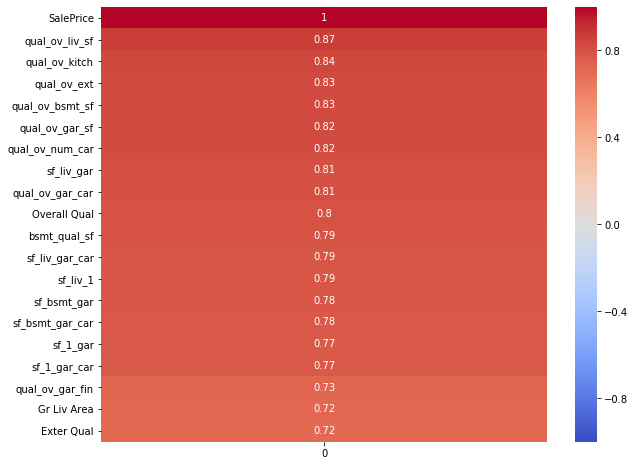

In [85]:
correlations = train.corrwith(train.SalePrice).to_frame()
correlations['ABS'] = correlations[0].abs()
sorted_abs_corrs = correlations.sort_values('ABS',ascending=False)[0]

# print(sorted_abs_corrs.head(40))

col_high_corr = correlations.index[(correlations['ABS'] >= .5) &
                                   (correlations.index != 'SalePrice')]

    # ^ all features with a correlation to SalePrice above .5 are inputed to this list

print(col_high_corr) 
print()
print('There are', len(col_high_corr),'highly-correlated features.')

fig,ax = plt.subplots(figsize=(10,8))

sns.heatmap(sorted_abs_corrs.head(20).to_frame(),
            vmin=-1, vmax=1, ax=ax, annot=True, cmap='coolwarm');

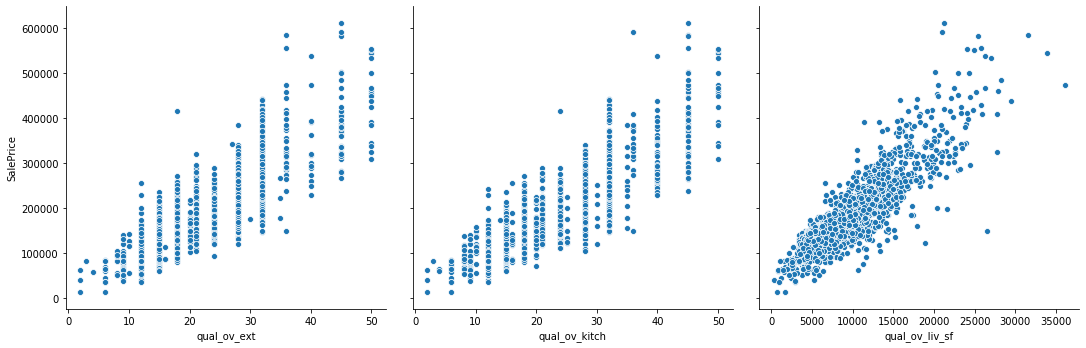

In [86]:
sns.pairplot(data=train, x_vars=col_high_corr[20:][:3], y_vars='SalePrice', height=5, aspect=1);

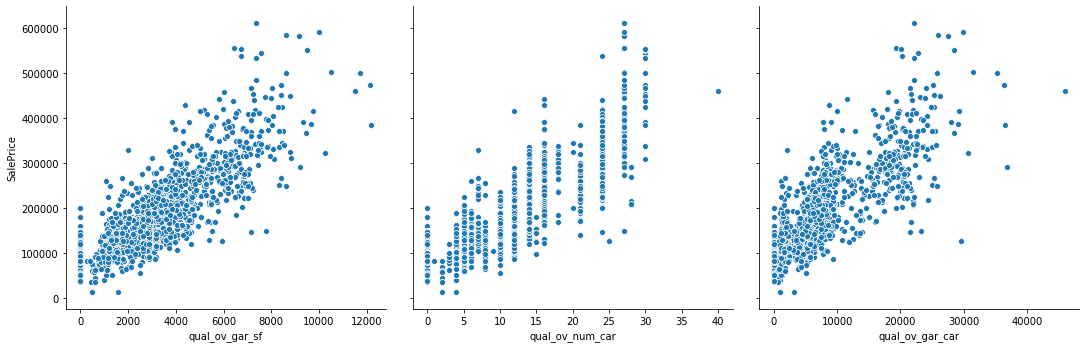

In [87]:
sns.pairplot(data=train, x_vars=col_high_corr[24:][:3], y_vars='SalePrice', height=5, aspect=1);

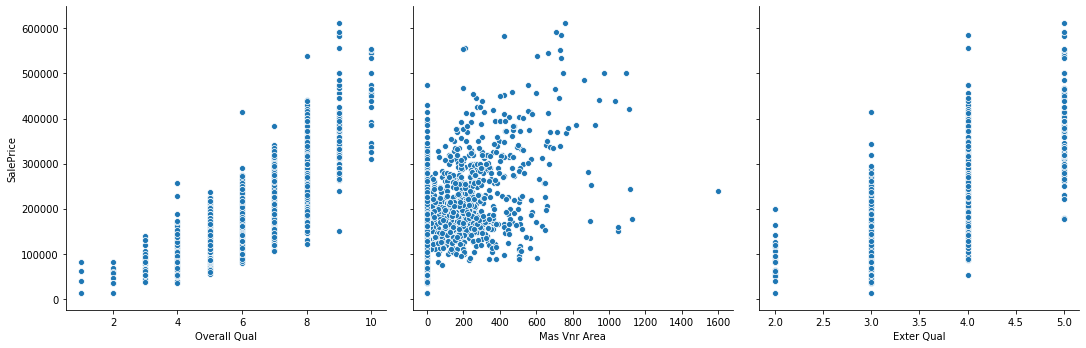

In [88]:
sns.pairplot(data=train, x_vars=col_high_corr[:3], y_vars='SalePrice', height=5, aspect=1);

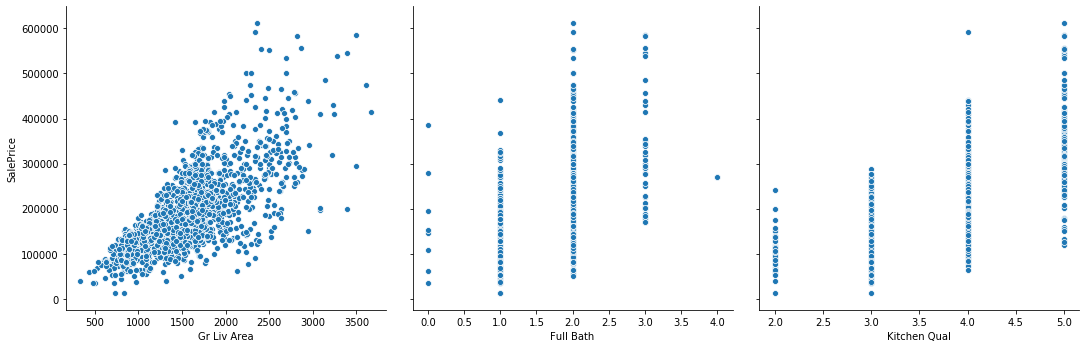

In [89]:
sns.pairplot(data=train, x_vars=col_high_corr[6:][:3], y_vars='SalePrice', height=5, aspect=1);

# Preprocessing

[Return to Table of Contents](#Contents:)


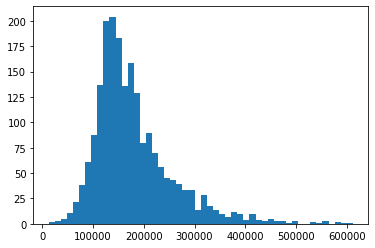

In [90]:
plt.hist(train['SalePrice'], bins=50);

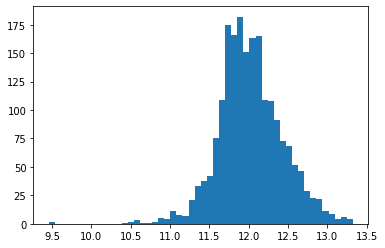

In [91]:
y=train['SalePrice']
log_y = np.log1p(y)

plt.hist(log_y, bins=50);

## Prep the Test Data

[Return to Table of Contents](#Contents:)


In [92]:

# Adding interaction terms
def add_interaction(df):
    df['garage_cars_area'] = df['Garage Cars'] * df['Garage Area']
    df['age_house'] = df['Yr Sold'] - df['Year Built']
    df['yr_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df['bsmt_qual_cond'] = df['Bsmt Qual'] * df['Bsmt Cond']
    df['bsmt_qual_sf'] = df['Bsmt Qual'] * df['Total Bsmt SF']
    df['qual_ov_ext'] = df['Overall Qual'] * df['Exter Qual']
    df['qual_ov_kitch'] = df['Overall Qual'] * df['Kitchen Qual']
    df['qual_ov_age'] = df['Overall Qual'] * df['age_house']
    df['qual_ov_yr_remod'] = df['Overall Qual'] * df['yr_since_remod']
    df['qual_ov_liv_sf'] = df['Overall Qual'] * df['Gr Liv Area']
    df['qual_ov_bsmt_sf'] = df['Overall Qual'] * df['Total Bsmt SF']
    df['qual_ov_gar_sf'] = df['Overall Qual'] * df['Garage Area']
    df['qual_ov_num_car'] = df['Overall Qual'] * df['Garage Cars']
    df['qual_ov_gar_car'] = df['Overall Qual'] * df['garage_cars_area']
    df['qual_ov_gar_fin'] = df['Overall Qual'] * df['Garage Finish']
    df['sf_liv_1'] = df['1st Flr SF'] * df['Gr Liv Area']
    df['sf_liv_2'] = df['2nd Flr SF'] * df['Gr Liv Area']
    df['sf_liv_gar_car'] = df['garage_cars_area'] * df['Gr Liv Area']
    df['sf_liv_gar'] = df['Garage Area'] * df['Gr Liv Area']
    df['sf_1_bsmt'] = df['1st Flr SF'] * df['Total Bsmt SF']
    df['sf_1_gar'] = df['1st Flr SF'] * df['Garage Area']
    df['sf_1_gar_car'] = df['1st Flr SF'] * df['garage_cars_area']
    df['sf_bsmt_gar_car'] = df['Total Bsmt SF'] * df['garage_cars_area']
    df['sf_bsmt_gar'] = df['Total Bsmt SF'] * df['Garage Area']
    return 

In [93]:

test_data = pd.read_csv('./datasets/test.csv')
test_data['MS SubClass'] = test_data['MS SubClass'].astype(str)

test_float_col = test_data.columns[test_data.dtypes == float]
test_int_col = test_data.columns[test_data.dtypes == int]
test_obj_col = test_data.columns[test_data.dtypes == object]

for col in test_int_col:
    test_data[col].fillna(0, inplace = True)

for col in test_float_col:
    test_data[col].fillna(0, inplace = True)

for col in test_obj_col:
    test_data[col].fillna('NA', inplace = True)

print(test_data.columns[test_data.isnull().any()])

for col,vals in ordinal_dict.items():
    test_data[col] = [vals[x] for x in test_data[col]]

test_float_col = test_data.columns[test_data.dtypes == float]
test_int_col = test_data.columns[test_data.dtypes == int]
test_obj_col = test_data.columns[test_data.dtypes == object]

test_data = pd.get_dummies(test_data, columns=test_obj_col, drop_first=True)

add_interaction(test_data)


Index([], dtype='object')


# Model the Data

[Return to Table of Contents](#Contents:)


In [94]:
lr = LinearRegression()

y = train['SalePrice']


def lin_log_fit_score(x_col_list, y=log_y):
    X = train[x_col_list] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #,stratify = y)

    lr.fit(X_train, y_train)
    print(f'training score: {lr.score(X_train, y_train)}')
    print(f'testing score: {lr.score(X_test, y_test)}')
    print(f'cross val score: {cross_val_score(lr, X, y, cv=5).mean()}')
#     print()
#     print(lr.coef_, x_col_list)
    print()

    lr.fit(X, y)
    print(f'total score: {lr.score(X, y)}')
#     print()
#     print(lr.coef_, x_col_list)
    preds = np.expm1(lr.predict(X))
    print()
    print('RMSE is ',np.sqrt(mean_squared_error(y_true=np.expm1(y), y_pred=preds)))
    print()

    plt.scatter(preds, np.expm1(y), alpha=.1);
    plt.plot(y, y, linestyle='solid',
            color='red');
    
    X_test_data = test_data[x_col_list]
    X_test_data.fillna(0, inplace=True)

    actual_pred = np.expm1(lr.predict(X_test_data))
    test_data['SalePrice'] = actual_pred
    submit = test_data[['Id', 'SalePrice']]
    return submit.head()

def lin_fit_score(x_col_list, y=y):
    X = train[x_col_list] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #,stratify = y)

    lr.fit(X_train, y_train)
    print(f'training score: {lr.score(X_train, y_train)}')
    print(f'testing score: {lr.score(X_test, y_test)}')
    print(f'cross val score: {cross_val_score(lr, X, y, cv=5).mean()}')
    print()
#     print(lr.coef_, x_col_list)
#     print()

    lr.fit(X, y)
    print(f'total score: {lr.score(X, y)}')
#     print()
#     print(lr.coef_, x_col_list)
    preds = lr.predict(X)
    print()
    print('RMSE is ',np.sqrt(mean_squared_error(y_true=y, y_pred=preds)))
    print()
    
    resids = y - preds

    plt.scatter(preds, y, alpha=.1);
    plt.plot(y, y, linestyle='solid',
            color='red');
    
#     plt.scatter(preds, resids, alpha=.1);
#     plt.axhline(color='black');
    
    X_test_data = test_data[x_col_list]
    X_test_data.fillna(0, inplace=True)

    actual_pred = lr.predict(X_test_data)
    test_data['SalePrice'] = actual_pred
    submit = test_data[['Id', 'SalePrice']]
    return submit.head()

def submit_csv(name_file, x_col_list, y=y):
    X = train[x_col_list] 

    X_test_data = test_data[x_col_list]
    X_test_data.fillna(0, inplace=True)
    
    lr.fit(X, y)

    actual_pred = lr.predict(X_test_data)
    test_data['SalePrice'] = actual_pred
    submit = test_data[['Id', 'SalePrice']]
    submit.to_csv(f'./datasets/submission{name_file}.csv', index=False)
    print(f'{name_file} saved to csv in datasets folder.')
    return submit.head()

def submit_ridge_csv(name_file, x_col_list, y=y):
    X = train[x_col_list] 

    X_test_data = test_data[x_col_list]
    X_test_data.fillna(0, inplace=True)
    
    ridgecv.fit(X, y)


    actual_pred = ridgecv.predict(X_test_data)
    test_data['SalePrice'] = actual_pred
    submit = test_data[['Id', 'SalePrice']]
    submit.to_csv(f'./datasets/submission{name_file}.csv', index=False)
    print(f'{name_file} saved to csv in datasets folder.')
    return submit.head()

# Evaluate Models

[Return to Table of Contents](#Contents:)


In [95]:
# RMSE of the true values of y = train['SalePrice']
# ## ^ baseline RMSE

np.sqrt(np.mean(y**2))

197349.04789892767

training score: 0.901017528774694
testing score: 0.8950154104891007
cross val score: 0.8935038276791072

total score: 0.9005900232139005

RMSE is  24938.25755380426



/Users/meggan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,Id,SalePrice
0,2658,134290.267100
1,2718,205975.997122
2,2414,192816.633167
3,1989,123990.647390
4,625,183458.979758


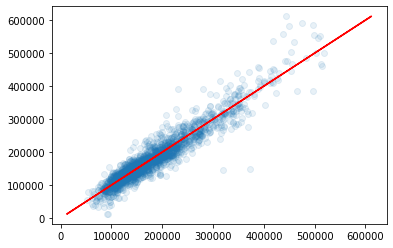

In [96]:
lin_fit_score(col_high_corr)

training score: 0.8741722768489101
testing score: 0.8556820769985376
cross val score: 0.8635421449589888

total score: 0.8709279024489494

RMSE is  25335.02593898819



/Users/meggan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,Id,SalePrice
0,2658,133905.378671
1,2718,206731.189529
2,2414,195725.792303
3,1989,124496.494443
4,625,179400.029858


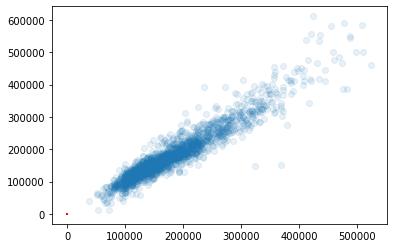

In [97]:
lin_log_fit_score(col_high_corr, y=log_y)

training score:  0.9007246567030494
test score:  0.894791069053835
total score:  0.8991624753251681


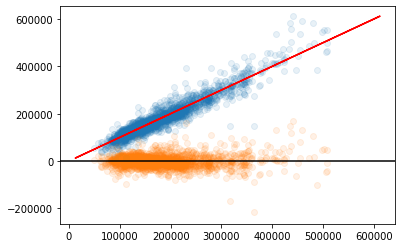

In [98]:

X = train[col_high_corr]
y = train['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #, stratify = y)


ridge_alphas = np.logspace(0, 5, 100) 


ridgecv = RidgeCV(alphas=ridge_alphas,
                  scoring='r2',
                  cv=5)


ridgecv.fit(X_train, y_train)
print('training score: ',ridgecv.score(X_train, y_train))
print('test score: ',ridgecv.score(X_test, y_test))
print('total score: ',ridgecv.score(X, y))

preds = ridgecv.predict(X)

resids = y - preds

plt.scatter(preds, y, alpha=.1);
plt.plot(y, y, linestyle='solid',
        color='red');

plt.scatter(preds, resids, alpha=.1);
plt.axhline(color='black');



In [99]:
ridgecv.alpha_

16.297508346206442

In [100]:
ridgecv.coef_

array([-1.21398213e+04,  7.57225851e+00, -2.92132638e+03, -4.15042448e+03,
       -2.70963543e+01,  3.12749844e+01, -2.68164425e+01, -4.81676906e+03,
        1.48799991e+03, -4.47334413e+02,  3.40111605e+03, -6.39156185e+02,
        5.77805700e+03,  1.75659198e+02, -1.46523613e+03, -1.49108030e+02,
       -2.99064300e+02, -6.33418355e+01,  1.13397743e+03,  9.85201418e+00,
        8.90205318e+02,  1.16591087e+03,  9.88580832e+00,  3.17211828e+00,
       -1.83554454e+01, -1.50580380e+03,  7.46265197e+00,  6.27256187e+02,
        4.50786451e-04, -1.22512561e-02,  5.84332038e-02, -7.88541529e-04,
       -1.32427727e-01,  3.71527241e-02, -4.43863137e-03,  2.20384038e-02])

In [101]:
X = train[col_high_corr]

pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lasso', Lasso(max_iter=1e7))
])


params = {
    'lasso__alpha' : np.linspace(1, 30, 10),
}

pipe_gs = GridSearchCV(pipe,
                  param_grid=params,
                  cv=5) #, verbose=2)

pipe_gs.fit(X, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('ss',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True,
                                              max_iter=10000000.0,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=Fal

In [102]:
pipe_gs.best_params_

{'lasso__alpha': 10.666666666666668}

In [103]:
pipe_gs.best_score_

0.8938283216941612

In [104]:
pipe_lasso =  pipe_gs.best_estimator_.steps[-1][-1]

pd.DataFrame(pipe_lasso.coef_, index=X.columns).sort_values(0)

,0
garage_cars_area,-35843.765955
sf_1_gar,-24111.812105
Overall Qual,-19787.567808
qual_ov_num_car,-19661.832916
Gr Liv Area,-11515.779531
Total Bsmt SF,-7950.428005
Bsmt Qual,-5995.437137
yr_since_remod,-5717.476716
age_house,-4537.544204
sf_1_bsmt,-4078.069241


# Kaggle Submissions

[Return to Table of Contents](#Contents:)


In [105]:
# # submission 1: before dummy variabloes created

# top_13_corr = ['Overall Qual', 'Gr Liv Area',
#  'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
#  'Year Built', 'Year Remod/Add', 'Full Bath', 'Mas Vnr Area', 
#                'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1']

# X = train[top_13_corr] 
# y = train['SalePrice']

# lr.score(X_train, y_train)
### 0.7931651950974724
# lr.score(X_test, y_test)
### 0.8476691888064504

In [106]:
# # submission 2: null to NA Alley & Fence; Garage Yr null to 0; remove Id & PID;
# # change MS Subclass to str; get dummies; remove training data where 'Gr Liv Area' >4000

# col_high_corr = correlations.index[(correlations['ABS'] >= .4) &
#                                    (correlations.index != 'SalePrice')]
# Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
#        'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
#        'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
#        'Garage Area', 'Neighborhood_NridgHt', 'Mas Vnr Type_None',
#        'Exter Qual_Gd', 'Exter Qual_TA', 'Foundation_PConc', 'Bsmt Qual_TA',
#        'BsmtFin Type 1_GLQ', 'Kitchen Qual_TA', 'Fireplace Qu_NA',
#        'Garage Finish_Unf'],
#       dtype='object')

# training score: 0.8812931909745474
# testing score: 0.8634363013535616
# cross val score: 0.8732795184112362
# total score: 0.8776416676393106

# submit_csv(name_file='thurs_am', x_col_list=col_high_corr)


# ### when only logging the y -- it does not change much...

# training score: 0.8801010187910275
# testing score: 0.8485201055446565
# cross val score: 0.8702420391200988
# total score: 0.8730582861380817

In [107]:
# ##submit_csv(x_col_list=col_high_corr, name_file="_interaction")

# training score: 0.9046510403621792
# testing score: 0.8810536681890355
# cross val score: 0.8933068039365125

# [ 1.23321536e+05  5.09240822e+02  4.06394133e+02  1.20851911e+01
#  -8.69102258e+03 -6.22596944e+03 -4.93469348e+01  3.42647081e+01
#  -1.12496100e+01 -4.98020461e+03  1.21149658e+03 -9.88468592e+02
#   3.06869095e+03 -6.49357661e+03  1.92551060e+04  9.42235732e+01
#  -1.56336955e+03 -5.08342918e+01  2.07164106e+03  9.03041294e+00
#   1.88856062e+03  9.85165001e+02 -7.16677540e+01 -1.06439407e+00
#   8.68137294e+00  7.08641793e+00 -4.79988201e-01 -3.63239301e+03
#   3.52665742e+00  1.70262368e+03 -2.13205849e-03 -6.28888589e-03
#   4.19556932e-02 -1.05376254e-03 -1.30302651e-01  2.90328525e-02
#   4.06198511e-03  2.44049368e-02 -4.24790452e+01  6.03676429e+01] Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
#        'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
#        'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplace Qu',
#        'Garage Finish', 'Garage Cars', 'Garage Area', 'Foundation_PConc',
#        'garage_cars_area', 'bsmt_qual_cond', 'bsmt_qual_sf', 'qual_ov_ext',
#        'qual_ov_kitch', 'qual_ov_yr_built', 'qual_ov_yr_remod',
#        'qual_ov_liv_sf', 'qual_ov_bsmt_sf', 'qual_ov_gar_sf',
#        'qual_ov_num_car', 'qual_ov_gar_car', 'qual_ov_gar_fin', 'sf_liv_1',
#        'sf_liv_gar_car', 'sf_liv_gar', 'sf_1_bsmt', 'sf_1_gar', 'sf_1_gar_car',
#        'sf_bsmt_gar_car', 'sf_bsmt_gar', 'age_house', 'yr_since_remod'],
#       dtype='object')

# total score: 0.9008475456040901

In [108]:
# # #3 submit_ridge_csv(name_file='Thurs_ridge1', x_col_list=col_high_corr)

# training score:  0.8863267208444685
# test score:  0.8745962753703291
# total score:  0.8833973102786523

# ridgecv.alpha_
# 7.220809018385464
# ridgecv.coef_
# array([ 1.05042424e+04,  1.40526727e+02,  1.53043124e+02,  4.69330857e+01,
#         1.24787140e+04, -5.85170505e+01,  4.51829578e+03,  2.21096472e+01,
#         1.33373764e+01,  1.89130948e+03,  1.27838403e+01,  4.99631542e+01,
#        -4.83757071e+03,  1.02637968e+04,  6.75706304e+01,  5.72784946e+03,
#         7.58418183e+02,  3.74028553e+03, -9.11150479e+03, -9.16874297e+00,
#         1.70029602e+04,  1.16976632e+04,  1.98168812e+03,  2.14305582e+01])

# Conclusions and Recommendations

[Return to Table of Contents](#Contents:)


total score: 0.9005900232139005



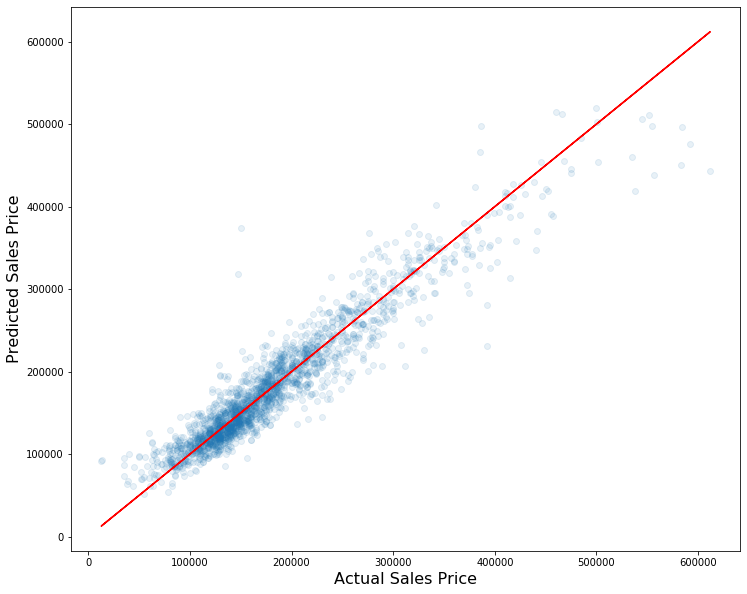

In [109]:
X = train[col_high_corr] 

lr.fit(X, y)
print(f'total score: {lr.score(X, y)}')
print()

preds = lr.predict(X)

resids = y - preds

fig,ax = plt.subplots(figsize=(12,10))

plt.scatter(y=preds, x=y, alpha=.1);
plt.plot(y, y, linestyle='solid',
        color='red');
ax.set_ylabel('Predicted Sales Price', fontsize=16)
ax.set_xlabel('Actual Sales Price', fontsize=16);

# plt.scatter(preds, resids, alpha=.1);
# plt.axhline(color='black');

In [117]:
df_coef_col_high = pd.DataFrame(lr.coef_, col_high_corr)
df_coef_col_high['Linear Regression Coefficient'] = df_coef_col_high[0]
df_coef_col_high.sort_values(by='Linear Regression Coefficient')['Linear Regression Coefficient'].to_frame().head(15)

,Linear Regression Coefficient
Overall Qual,-13937.506166
Exter Qual,-8292.367187
Bsmt Qual,-6727.582333
Full Bath,-5302.834932
qual_ov_num_car,-4164.937717
Foundation_PConc,-1624.761350
TotRms AbvGrd,-517.379678
yr_since_remod,-278.506306
age_house,-150.933238
garage_cars_area,-59.729060


In [118]:
df_coef_col_high.sort_values(by='Linear Regression Coefficient', 
                             ascending=False)['Linear Regression Coefficient'].to_frame().head(15)

,Linear Regression Coefficient
Garage Cars,24888.713346
Garage Finish,3537.221799
Fireplace Qu,3132.128345
Kitchen Qual,2192.658529
qual_ov_ext,1824.477753
bsmt_qual_cond,1661.743624
qual_ov_kitch,974.433702
Garage Area,77.491654
1st Flr SF,23.653041
bsmt_qual_sf,10.794350


In [112]:
col_high_corr

Index(['Overall Qual', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 'Fireplace Qu', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Foundation_PConc', 'age_house',
       'yr_since_remod', 'garage_cars_area', 'bsmt_qual_cond', 'bsmt_qual_sf',
       'qual_ov_ext', 'qual_ov_kitch', 'qual_ov_liv_sf', 'qual_ov_bsmt_sf',
       'qual_ov_gar_sf', 'qual_ov_num_car', 'qual_ov_gar_car',
       'qual_ov_gar_fin', 'sf_liv_1', 'sf_liv_gar_car', 'sf_liv_gar',
       'sf_1_bsmt', 'sf_1_gar', 'sf_1_gar_car', 'sf_bsmt_gar_car',
       'sf_bsmt_gar'],
      dtype='object')

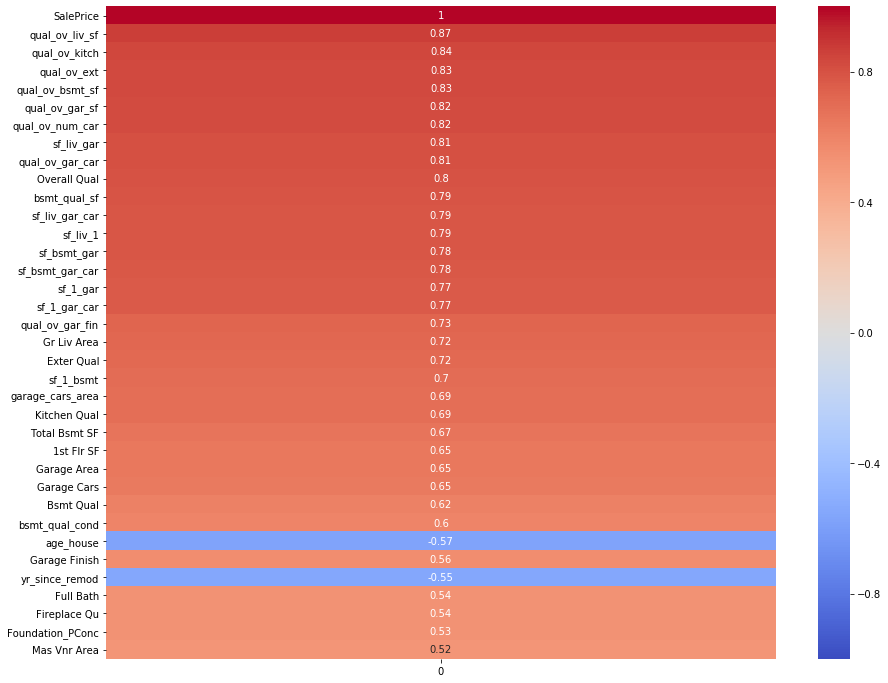

In [116]:
fig,ax = plt.subplots(figsize=(15,12))


sns.heatmap(sorted_abs_corrs.head(len(col_high_corr)).to_frame(),
            vmin=-1, vmax=1, ax=ax, annot=True, cmap='coolwarm');